# Table of Contents

1. [Stage 1: Load and Explore the Data](#Stage-1:-Load-and-Explore-the-Data)
2. [Stage 2: Data preparation](#Stage-2:-Data-preparation)
3. [Stage 3: Train and Test Data Split](#Stage-3:-Train-and-Test-Data-Split)
4. [Stage 4: Decision Tree ML](#Stage-4:-Decision-Tree-ML)
5. [Stage 5: Random Forest ML](#Stage-5:-Random-Forest-ML)
6. [Stage 6: K Neighbors ML](#Stage-6:-K-Neighbors-ML)
7. [Stage 7: Models Comparison and Results](#Stage-7:-Models-Comparison-and-Results)

## Stage 1: Load and Explore the Data

In [1]:
# ===============================
# Environment setup
# ===============================

import sys
import subprocess

def install_if_missing(packages):
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing missing package: {package}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

required_packages = [
    "pandas","numpy","matplotlib","seaborn",
    "scikit-learn","graphviz","ipython","joblib"
]

install_if_missing(required_packages)

Installing missing package: scikit-learn
Installing missing package: ipython


In [2]:
# ===============================
# Imports for Churn Prediction ML
# ===============================

# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Save models
import joblib

# Model training and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tree visualization
from IPython.display import SVG, display
from graphviz import Source

customerInfo=pd.read_csv("churn.csv")
customerInfo.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
columns = customerInfo.columns.tolist()
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
customerInfo.loc[customerInfo.Churn == 'No', 'Churn'] = 0
customerInfo.loc[customerInfo.Churn == 'Yes', 'Churn'] = 1
customerInfo=customerInfo.astype({"Churn": 'int64'})

missingChurnInfo = customerInfo['Churn'].isnull().sum()
print(f"Missing Churn Values: {missingChurnInfo}")

customersCount=len(customerInfo)
stillWihtUs = sum(customerInfo['Churn'])
print("We have historical information about %d customers, but only %d of them continued to consume our service (%f%%)" % (customersCount, stillWihtUs, (stillWihtUs/customersCount*100)))
customerInfo['Churn'].value_counts(normalize=True) * 100

Missing Churn Values: 0
We have historical information about 7043 customers, but only 1869 of them continued to consume our service (26.536987%)


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [4]:
customerInfo.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
customerInfo.groupby('gender').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

In [6]:
customerInfo.groupby('SeniorCitizen').agg({'Churn':['count','sum','mean']})

Churn                
              count   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

In [7]:
customerInfo.groupby('Partner').agg({'Churn':['count','sum','mean']})

Churn                
        count   sum      mean
Partner                      
No       3641  1200  0.329580
Yes      3402   669  0.196649

In [8]:
customerInfo.groupby('Dependents').agg({'Churn':['count','sum','mean']})

Churn                
           count   sum      mean
Dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502

In [9]:
customerInfo.groupby('tenure').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
tenure                     
0         11    0  0.000000
1        613  380  0.619902
2        238  123  0.516807
3        200   94  0.470000
4        176   83  0.471591
...      ...  ...       ...
68       100    9  0.090000
69        95    8  0.084211
70       119   11  0.092437
71       170    6  0.035294
72       362    6  0.016575

[73 rows x 3 columns]

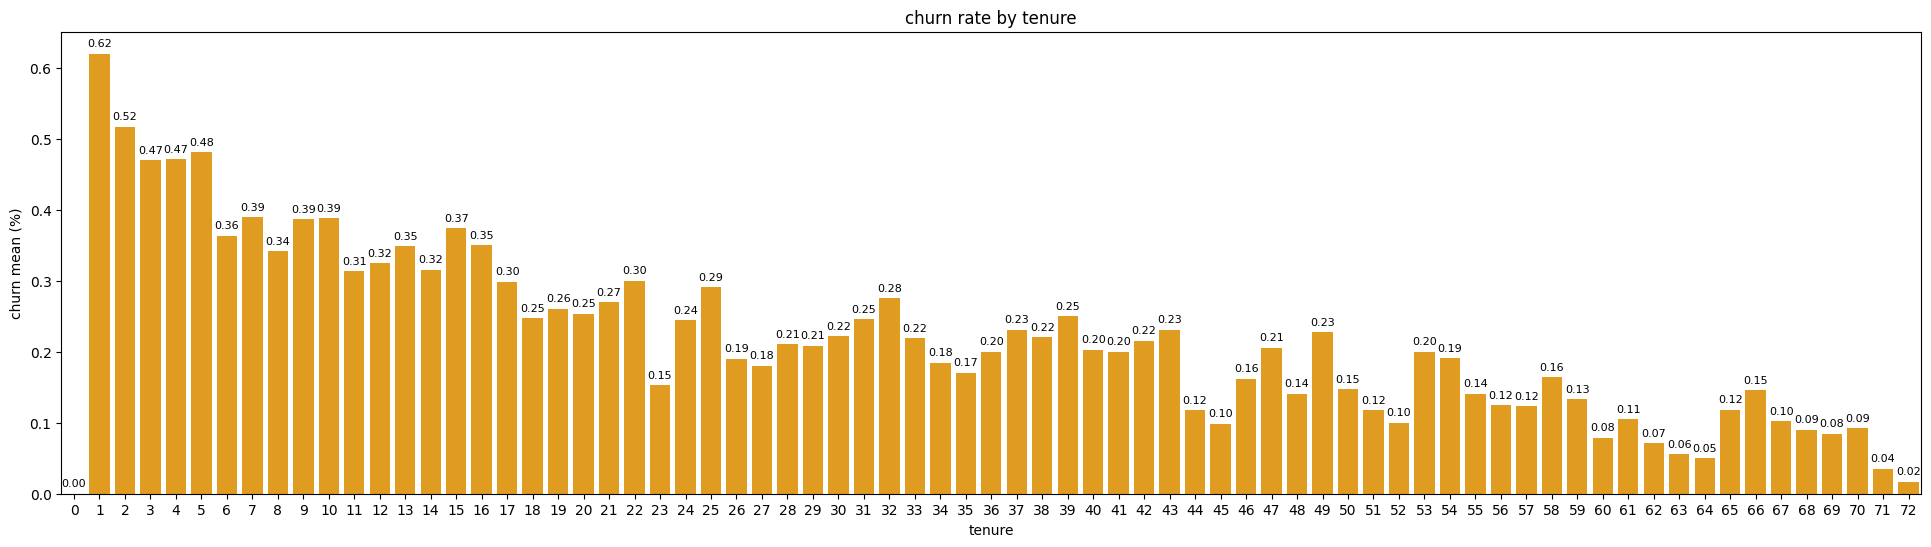

In [10]:
groupByTenure=customerInfo.groupby('tenure').agg({'Churn':['count','sum','mean']})
plt.figure(figsize=(24, 6))
sns.barplot(x=groupByTenure.index, y=groupByTenure['Churn', 'mean'], color='orange')
for index, value in enumerate(groupByTenure[('Churn', 'mean')]):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=8)
plt.title('churn rate by tenure')
plt.ylabel('churn mean (%)')
plt.show()

In [11]:
customerInfo.groupby('PhoneService').agg({'Churn':['count','sum','mean']})

Churn                
             count   sum      mean
PhoneService                      
No             682   170  0.249267
Yes           6361  1699  0.267096

In [12]:
customerInfo.groupby('MultipleLines').agg({'Churn':['count','sum','mean']})

Churn               
                 count  sum      mean
MultipleLines                        
No                3390  849  0.250442
No phone service   682  170  0.249267
Yes               2971  850  0.286099

In [13]:
customerInfo.groupby('InternetService').agg({'Churn':['count','sum','mean']})

Churn                
                count   sum      mean
InternetService                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

In [14]:
customerInfo.groupby('OnlineSecurity').agg({'Churn':['count','sum','mean']})

Churn                
                    count   sum      mean
OnlineSecurity                           
No                   3498  1461  0.417667
No internet service  1526   113  0.074050
Yes                  2019   295  0.146112

In [15]:
customerInfo.groupby('OnlineBackup').agg({'Churn':['count','sum','mean']})

Churn                
                    count   sum      mean
OnlineBackup                             
No                   3088  1233  0.399288
No internet service  1526   113  0.074050
Yes                  2429   523  0.215315

In [16]:
customerInfo.groupby('DeviceProtection').agg({'Churn':['count','sum','mean']})

Churn                
                    count   sum      mean
DeviceProtection                         
No                   3095  1211  0.391276
No internet service  1526   113  0.074050
Yes                  2422   545  0.225021

In [17]:
customerInfo.groupby('TechSupport').agg({'Churn':['count','sum','mean']}) 

Churn                
                    count   sum      mean
TechSupport                              
No                   3473  1446  0.416355
No internet service  1526   113  0.074050
Yes                  2044   310  0.151663

In [18]:
columns = ['InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
internetServiceOnlyData=[]

for column in columns:
    grouped = customerInfo.groupby(column).agg({'Churn': 'mean'}).reset_index()
    grouped['Feature'] = column 
    grouped = grouped.rename(columns={column: 'Category', 'Churn': 'Churn mean'})
    internetServiceOnlyData.append(grouped)

internetServiceOnlyDF = pd.concat(internetServiceOnlyData, ignore_index=True)

internetServiceOnlyDF = internetServiceOnlyDF[~((internetServiceOnlyDF['Feature'] == 'InternetService') & (internetServiceOnlyDF['Category'] == 'No'))]
internetServiceOnlyDF = internetServiceOnlyDF[~((internetServiceOnlyDF['Feature'] == 'OnlineBackup') & (internetServiceOnlyDF['Category'] == 'No internet service'))]
internetServiceOnlyDF = internetServiceOnlyDF[~((internetServiceOnlyDF['Feature'] == 'DeviceProtection') & (internetServiceOnlyDF['Category'] == 'No internet service'))]
internetServiceOnlyDF = internetServiceOnlyDF[~((internetServiceOnlyDF['Feature'] == 'TechSupport') & (internetServiceOnlyDF['Category'] == 'No internet service'))]
internetServiceOnlyDF.columns = ['Service exist?', 'Churn mean', 'Service Type']
internetServiceOnlyDF['Churn mean'] *= 100
internetServiceOnlyDF

,Service exist?,Churn mean,Service Type
0,DSL,18.959108,InternetService
1,Fiber optic,41.892765,InternetService
3,No,39.928756,OnlineBackup
5,Yes,21.531494,OnlineBackup
6,No,39.127625,DeviceProtection
8,Yes,22.502064,DeviceProtection
9,No,41.635474,TechSupport
11,Yes,15.166341,TechSupport


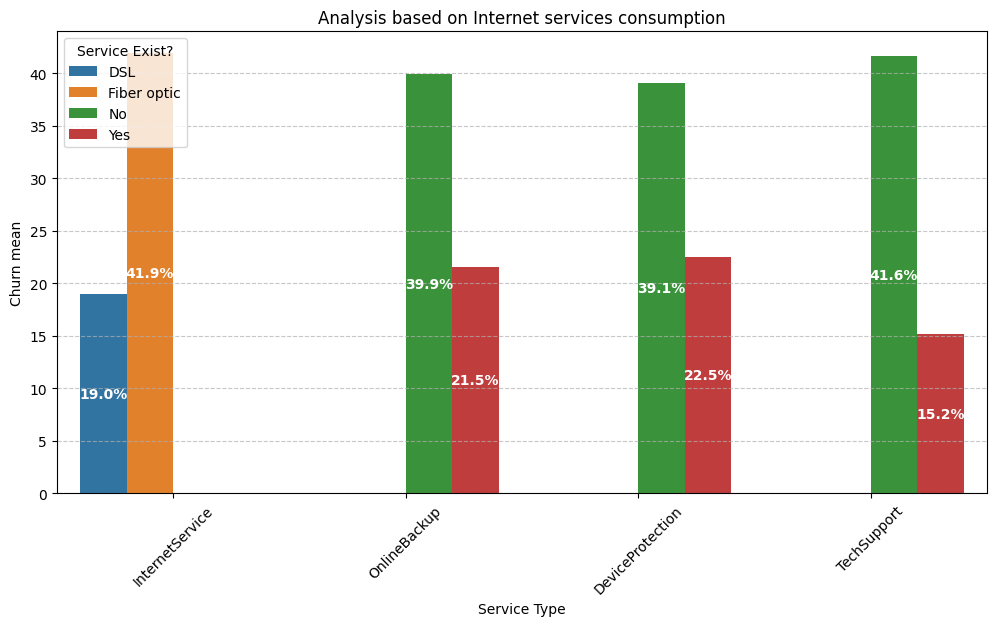

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Service Type', y='Churn mean', hue='Service exist?', data=internetServiceOnlyDF)
plt.title('Analysis based on Internet services consumption')
plt.ylabel('Churn mean')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')
plt.legend(title="Service Exist?", loc='upper left')
plt.show()

In [20]:
dslCustomersOnly = customerInfo[customerInfo['InternetService'] == 'DSL']

columns = ['OnlineBackup', 'DeviceProtection', 'TechSupport']
dslCustomersOnlyData=[]

for column in columns:
    grouped = customerInfo.groupby(column).agg({'Churn': 'mean'}).reset_index()
    grouped['Feature'] = column 
    grouped = grouped.rename(columns={column: 'Category', 'Churn': 'Churn mean'})
    dslCustomersOnlyData.append(grouped)

dslCustomersOnlyDF = pd.concat(dslCustomersOnlyData, ignore_index=True)

#dslCustomersOnlyDF = dslCustomersOnlyDF[~((dslCustomersOnlyDF['Feature'] == 'InternetService') & (dslCustomersOnlyDF['Category'] == 'No'))]
dslCustomersOnlyDF = dslCustomersOnlyDF[~((dslCustomersOnlyDF['Feature'] == 'OnlineBackup') & (dslCustomersOnlyDF['Category'] == 'No internet service'))]
dslCustomersOnlyDF = dslCustomersOnlyDF[~((dslCustomersOnlyDF['Feature'] == 'DeviceProtection') & (dslCustomersOnlyDF['Category'] == 'No internet service'))]
dslCustomersOnlyDF = dslCustomersOnlyDF[~((dslCustomersOnlyDF['Feature'] == 'TechSupport') & (dslCustomersOnlyDF['Category'] == 'No internet service'))]
dslCustomersOnlyDF.columns = ['Service exist?', 'Churn mean', 'Service Type']
dslCustomersOnlyDF['Churn mean'] *= 100
dslCustomersOnlyDF

,Service exist?,Churn mean,Service Type
0,No,39.928756,OnlineBackup
2,Yes,21.531494,OnlineBackup
3,No,39.127625,DeviceProtection
5,Yes,22.502064,DeviceProtection
6,No,41.635474,TechSupport
8,Yes,15.166341,TechSupport


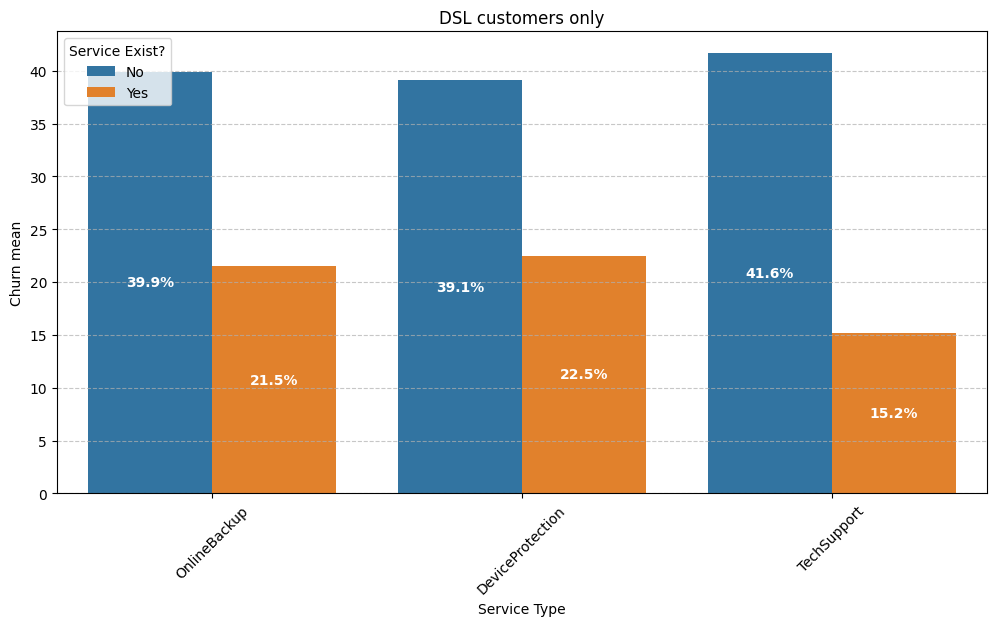

In [21]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Service Type', y='Churn mean', hue='Service exist?', data=dslCustomersOnlyDF)
plt.title('DSL customers only')
plt.ylabel('Churn mean')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')
plt.legend(title="Service Exist?", loc='upper left')
plt.show()

In [22]:
fiberCustomersOnly = customerInfo[customerInfo['InternetService'] == 'Fiber optic']

columns = ['OnlineBackup', 'DeviceProtection', 'TechSupport']
fiberCustomersOnlyData=[]

for column in columns:
    grouped = customerInfo.groupby(column).agg({'Churn': 'mean'}).reset_index()
    grouped['Feature'] = column 
    grouped = grouped.rename(columns={column: 'Category', 'Churn': 'Churn mean'})
    fiberCustomersOnlyData.append(grouped)

fiberCustomersOnlyDF = pd.concat(fiberCustomersOnlyData, ignore_index=True)

#dslCustomersOnlyDF = dslCustomersOnlyDF[~((dslCustomersOnlyDF['Feature'] == 'InternetService') & (dslCustomersOnlyDF['Category'] == 'No'))]
fiberCustomersOnlyDF = fiberCustomersOnlyDF[~((fiberCustomersOnlyDF['Feature'] == 'OnlineBackup') & (fiberCustomersOnlyDF['Category'] == 'No internet service'))]
fiberCustomersOnlyDF = fiberCustomersOnlyDF[~((fiberCustomersOnlyDF['Feature'] == 'DeviceProtection') & (fiberCustomersOnlyDF['Category'] == 'No internet service'))]
fiberCustomersOnlyDF = fiberCustomersOnlyDF[~((fiberCustomersOnlyDF['Feature'] == 'TechSupport') & (fiberCustomersOnlyDF['Category'] == 'No internet service'))]
fiberCustomersOnlyDF.columns = ['Service exist?', 'Churn mean', 'Service Type']
fiberCustomersOnlyDF['Churn mean'] *= 100
fiberCustomersOnlyDF

,Service exist?,Churn mean,Service Type
0,No,39.928756,OnlineBackup
2,Yes,21.531494,OnlineBackup
3,No,39.127625,DeviceProtection
5,Yes,22.502064,DeviceProtection
6,No,41.635474,TechSupport
8,Yes,15.166341,TechSupport


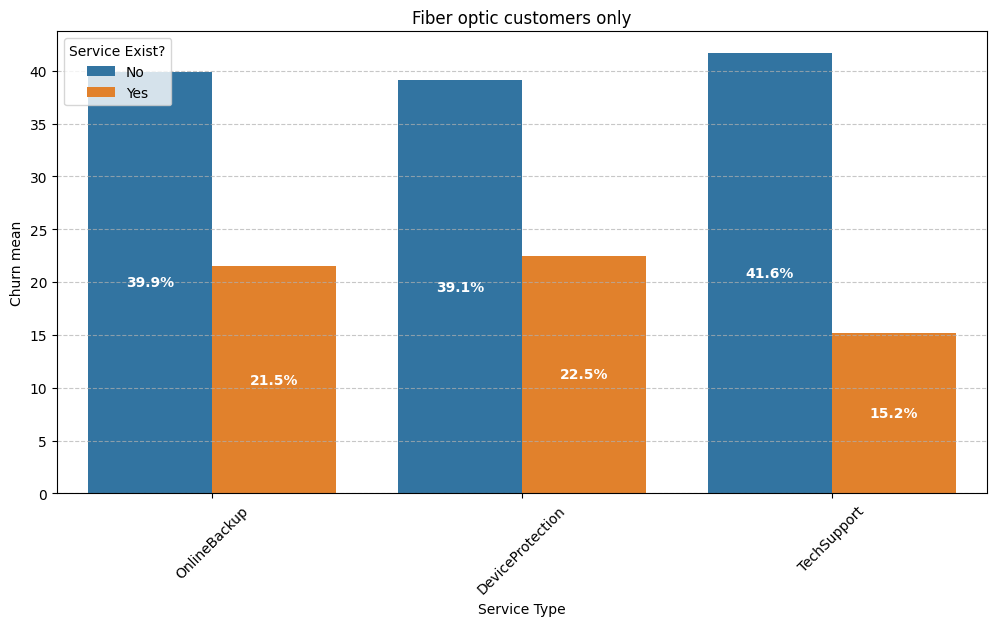

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Service Type', y='Churn mean', hue='Service exist?', data=fiberCustomersOnlyDF)
plt.title('Fiber optic customers only')
plt.ylabel('Churn mean')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')
plt.legend(title="Service Exist?", loc='upper left')
plt.show()

In [24]:
customerInfo['Service Bundle'] = customerInfo['PhoneService'] + ' + ' + customerInfo['InternetService']
customerInfo.groupby('Service Bundle').agg({'Churn':['count','sum','mean']})

Churn                
                  count   sum      mean
Service Bundle                         
No + DSL            682   170  0.249267
Yes + DSL          1739   289  0.166187
Yes + Fiber optic  3096  1297  0.418928
Yes + No           1526   113  0.074050

In [25]:
customerInfo.groupby(['InternetService','PhoneService']).agg({'Churn': 'mean'}).reset_index()

,InternetService,PhoneService,Churn
0,DSL,No,0.249267
1,DSL,Yes,0.166187
2,Fiber optic,Yes,0.418928
3,No,Yes,0.074050


In [26]:
customerInfo.groupby(['SeniorCitizen','InternetService','PhoneService']).agg({'Churn': 'mean'}).reset_index()

,SeniorCitizen,InternetService,PhoneService,Churn
0,0,DSL,No,0.217993
1,0,DSL,Yes,0.160985
2,0,Fiber optic,Yes,0.399117
3,0,No,Yes,0.073270
4,1,DSL,No,0.423077
5,1,DSL,Yes,0.219355
6,1,Fiber optic,Yes,0.472924
7,1,No,Yes,0.096154


In [27]:
customerInfo.groupby(['StreamingTV']).agg({'Churn': 'mean'}).reset_index()

,StreamingTV,Churn
0,No,0.335231
1,No internet service,0.074050
2,Yes,0.300702


In [28]:
customerInfo.groupby(['StreamingMovies']).agg({'Churn': 'mean'}).reset_index()

,StreamingMovies,Churn
0,No,0.336804
1,No internet service,0.074050
2,Yes,0.299414


In [29]:
customerInfo.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Service Bundle
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No + DSL
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,Yes + DSL
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes + DSL
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,No + DSL
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes + Fiber optic


In [30]:
customerInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
customerInfo['TotalCharges'] = customerInfo['TotalCharges'].replace(" ", "0")

In [35]:
print(customerInfo[customerInfo['TotalCharges'].str.strip() == ""])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, Service Bundle]
Index: []

[0 rows x 22 columns]


In [38]:
customerInfo['TotalCharges'] = pd.to_numeric(customerInfo['TotalCharges'])

In [39]:
customerInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


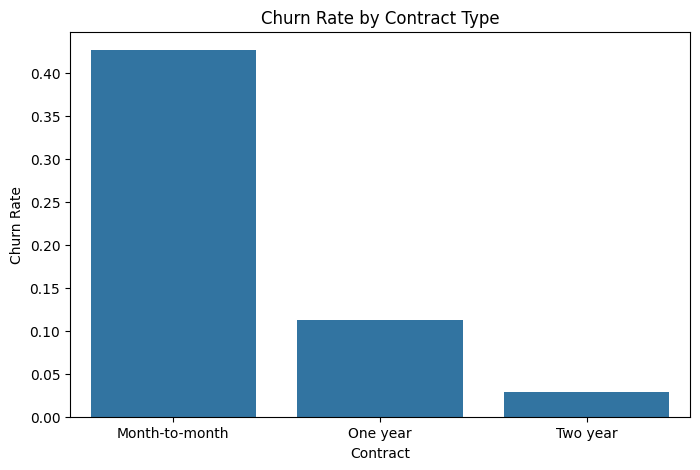

In [40]:
contractType=customerInfo.groupby(['Contract']).agg({'Churn': 'mean'}).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=contractType, x='Contract', y='Churn')
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()

In [41]:
customerInfo.groupby(['PaperlessBilling']).agg({'Churn': 'mean'}).reset_index()

,PaperlessBilling,Churn
0,No,0.163301
1,Yes,0.335651


In [42]:
customerInfo.groupby(['Contract','PaperlessBilling']).agg({'Churn': 'mean'}).reset_index()

,Contract,PaperlessBilling,Churn
0,Month-to-month,No,0.314973
1,Month-to-month,Yes,0.482985
2,One year,No,0.071322
3,One year,Yes,0.147500
4,Two year,No,0.016484
5,Two year,Yes,0.042038


In [43]:
customerInfo.groupby(['PaymentMethod']).agg({'Churn': 'mean'}).reset_index()

,PaymentMethod,Churn
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431
2,Electronic check,0.452854
3,Mailed check,0.191067


## Stage 2: Data preparation

In [60]:
customerInfo=pd.read_csv("churn.csv")
customerInfo.loc[customerInfo.Churn == 'No', 'Churn'] = 0
customerInfo.loc[customerInfo.Churn == 'Yes', 'Churn'] = 1
customerInfo=customerInfo.astype({"Churn": 'int64'})
customerInfo.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [61]:
column_mapping = {
    'customerID': 'customer_id',
    'gender': 'gender',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'has_partner',
    'Dependents': 'has_dependents',
    'tenure': 'tenure_in_months',
    'PhoneService': 'has_phone_srv',
    'MultipleLines': 'has_multiple_lines',
    'InternetService': 'has_internet_srv',
    'OnlineSecurity': 'has_online_security_srv',
    'OnlineBackup': 'has_online__backup_srv',
    'DeviceProtection': 'has_device_protection_srv',
    'TechSupport': 'has_tech_support_srv',
    'StreamingTV': 'has_streaming_tv_srv',
    'StreamingMovies': 'has_streaming_movies_srv',
    'Contract': 'contract_term',
    'PaperlessBilling': 'has_paperless_bill',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Churn': 'churn',
}
customerInfo.rename(columns=column_mapping, inplace=True)
customerInfo.head()

,customer_id,gender,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_multiple_lines,has_internet_srv,has_online_security_srv,...,has_device_protection_srv,has_tech_support_srv,has_streaming_tv_srv,has_streaming_movies_srv,contract_term,has_paperless_bill,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [62]:
customerInfo.loc[customerInfo.has_partner == 'No', 'has_partner'] = 0
customerInfo.loc[customerInfo.has_partner == 'Yes', 'has_partner'] = 1
customerInfo.loc[customerInfo.has_dependents == 'No', 'has_dependents'] = 0
customerInfo.loc[customerInfo.has_dependents == 'Yes', 'has_dependents'] = 1
customerInfo.head()

,customer_id,gender,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_multiple_lines,has_internet_srv,has_online_security_srv,...,has_device_protection_srv,has_tech_support_srv,has_streaming_tv_srv,has_streaming_movies_srv,contract_term,has_paperless_bill,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [63]:
customerInfo['has_phone_srv'] = (customerInfo['has_phone_srv'] == 'Yes').astype(int)
customerInfo['has_multiple_lines_yes'] = (customerInfo['has_multiple_lines'] == 'Yes').astype(int)
customerInfo.drop(columns=['has_multiple_lines'], inplace=True)
customerInfo.head()

,customer_id,gender,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_internet_srv,has_online_security_srv,has_online__backup_srv,...,has_tech_support_srv,has_streaming_tv_srv,has_streaming_movies_srv,contract_term,has_paperless_bill,payment_method,monthly_charges,total_charges,churn,has_multiple_lines_yes
0,7590-VHVEG,Female,0,1,0,1,0,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,Male,0,0,0,45,0,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,0,0,2,1,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


In [64]:
customerInfo['gender_male'] = (customerInfo['gender'] == 'Male').astype(int)
customerInfo['gender_female'] = (customerInfo['gender'] == 'Female').astype(int)
customerInfo.drop(columns=['gender'], inplace=True)
customerInfo.head()

,customer_id,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_internet_srv,has_online_security_srv,has_online__backup_srv,has_device_protection_srv,...,has_streaming_movies_srv,contract_term,has_paperless_bill,payment_method,monthly_charges,total_charges,churn,has_multiple_lines_yes,gender_male,gender_female
0,7590-VHVEG,0,1,0,1,0,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,1
1,5575-GNVDE,0,0,0,34,1,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.5,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1,0
4,9237-HQITU,0,0,0,2,1,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0,1


In [65]:
customerInfo['has_dsl'] = (customerInfo['has_internet_srv'] == 'DSL').astype(int)
customerInfo['has_fiber'] = (customerInfo['has_internet_srv'] == 'Fiber optic').astype(int)
customerInfo['no_internet_srv'] = (customerInfo['has_internet_srv'] == 'No').astype(int)
additional_srv_columns = ['has_online_security_srv', 'has_online__backup_srv', 'has_device_protection_srv', 
                   'has_tech_support_srv', 'has_streaming_tv_srv', 'has_streaming_movies_srv']
for col in additional_srv_columns:
    customerInfo[col + '_yes'] = (customerInfo[col] == 'Yes').astype(int)
customerInfo.drop(columns=['has_internet_srv'] + additional_srv_columns, inplace=True)
customerInfo.head()

,customer_id,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,contract_term,has_paperless_bill,payment_method,monthly_charges,...,gender_female,has_dsl,has_fiber,no_internet_srv,has_online_security_srv_yes,has_online__backup_srv_yes,has_device_protection_srv_yes,has_tech_support_srv_yes,has_streaming_tv_srv_yes,has_streaming_movies_srv_yes
0,7590-VHVEG,0,1,0,1,0,Month-to-month,Yes,Electronic check,29.85,...,1,1,0,0,0,1,0,0,0,0
1,5575-GNVDE,0,0,0,34,1,One year,No,Mailed check,56.95,...,0,1,0,0,1,0,1,0,0,0
2,3668-QPYBK,0,0,0,2,1,Month-to-month,Yes,Mailed check,53.85,...,0,1,0,0,1,1,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,One year,No,Bank transfer (automatic),42.30,...,0,1,0,0,1,0,1,1,0,0
4,9237-HQITU,0,0,0,2,1,Month-to-month,Yes,Electronic check,70.70,...,1,0,1,0,0,0,0,0,0,0


In [66]:
customerInfo['month_to_month_contract'] = (customerInfo['contract_term'] == 'Month-to-month').astype(int)
customerInfo['one_year_contract'] = (customerInfo['contract_term'] == 'One year').astype(int)
customerInfo['two_years_contract'] = (customerInfo['contract_term'] == 'Two year').astype(int)
customerInfo['has_paperless_bill'] = (customerInfo['has_paperless_bill'] == 'Yes').astype(int)
customerInfo.drop(columns=['contract_term'], inplace=True)
customerInfo.head()

,customer_id,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_paperless_bill,payment_method,monthly_charges,total_charges,...,no_internet_srv,has_online_security_srv_yes,has_online__backup_srv_yes,has_device_protection_srv_yes,has_tech_support_srv_yes,has_streaming_tv_srv_yes,has_streaming_movies_srv_yes,month_to_month_contract,one_year_contract,two_years_contract
0,7590-VHVEG,0,1,0,1,0,1,Electronic check,29.85,29.85,...,0,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,Mailed check,56.95,1889.5,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,Mailed check,53.85,108.15,...,0,1,1,0,0,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,...,0,1,0,1,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,1,Electronic check,70.70,151.65,...,0,0,0,0,0,0,0,1,0,0


In [67]:
customerInfo['electronic_check'] = (customerInfo['payment_method'] == 'Electronic check').astype(int)
customerInfo['mailed_check'] = (customerInfo['payment_method'] == 'Mailed check').astype(int)
customerInfo['automatic_bank_transfer'] = (customerInfo['payment_method'] == 'Bank transfer (automatic)').astype(int)
customerInfo['automatic_credit_card'] = (customerInfo['payment_method'] == 'Credit card (automatic)').astype(int)
customerInfo.drop(columns=['payment_method'], inplace=True)
customerInfo.head()

,customer_id,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_paperless_bill,monthly_charges,total_charges,churn,...,has_tech_support_srv_yes,has_streaming_tv_srv_yes,has_streaming_movies_srv_yes,month_to_month_contract,one_year_contract,two_years_contract,electronic_check,mailed_check,automatic_bank_transfer,automatic_credit_card
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,0,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,1,0,0,0


In [68]:
missing_values = customerInfo.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [69]:
print(customerInfo.dtypes)

customer_id                       object
senior_citizen                     int64
has_partner                       object
has_dependents                    object
tenure_in_months                   int64
has_phone_srv                      int64
has_paperless_bill                 int64
monthly_charges                  float64
total_charges                     object
churn                              int64
has_multiple_lines_yes             int64
gender_male                        int64
gender_female                      int64
has_dsl                            int64
has_fiber                          int64
no_internet_srv                    int64
has_online_security_srv_yes        int64
has_online__backup_srv_yes         int64
has_device_protection_srv_yes      int64
has_tech_support_srv_yes           int64
has_streaming_tv_srv_yes           int64
has_streaming_movies_srv_yes       int64
month_to_month_contract            int64
one_year_contract                  int64
two_years_contra

In [70]:
customerInfo['has_partner'] = pd.to_numeric(customerInfo['has_partner'])
customerInfo['has_dependents'] = pd.to_numeric(customerInfo['has_dependents'])
customerInfo['total_charges'] = pd.to_numeric(customerInfo['total_charges'], errors='coerce').fillna(0)
print(customerInfo.dtypes)

customer_id                       object
senior_citizen                     int64
has_partner                        int64
has_dependents                     int64
tenure_in_months                   int64
has_phone_srv                      int64
has_paperless_bill                 int64
monthly_charges                  float64
total_charges                    float64
churn                              int64
has_multiple_lines_yes             int64
gender_male                        int64
gender_female                      int64
has_dsl                            int64
has_fiber                          int64
no_internet_srv                    int64
has_online_security_srv_yes        int64
has_online__backup_srv_yes         int64
has_device_protection_srv_yes      int64
has_tech_support_srv_yes           int64
has_streaming_tv_srv_yes           int64
has_streaming_movies_srv_yes       int64
month_to_month_contract            int64
one_year_contract                  int64
two_years_contra

top features correlated with churn:churn                            1.000000
month_to_month_contract          0.405103
has_fiber                        0.308020
electronic_check                 0.301919
monthly_charges                  0.193356
has_paperless_bill               0.191825
senior_citizen                   0.150889
has_streaming_tv_srv_yes         0.063228
has_streaming_movies_srv_yes     0.061382
has_multiple_lines_yes           0.040102
has_phone_srv                    0.011942
gender_female                    0.008612
gender_male                     -0.008612
has_device_protection_srv_yes   -0.066160
has_online__backup_srv_yes      -0.082255
mailed_check                    -0.091683
automatic_bank_transfer         -0.117937
has_dsl                         -0.124214
automatic_credit_card           -0.134302
has_partner                     -0.150448
has_dependents                  -0.164221
has_tech_support_srv_yes        -0.164674
has_online_security_srv_yes     -0.171226

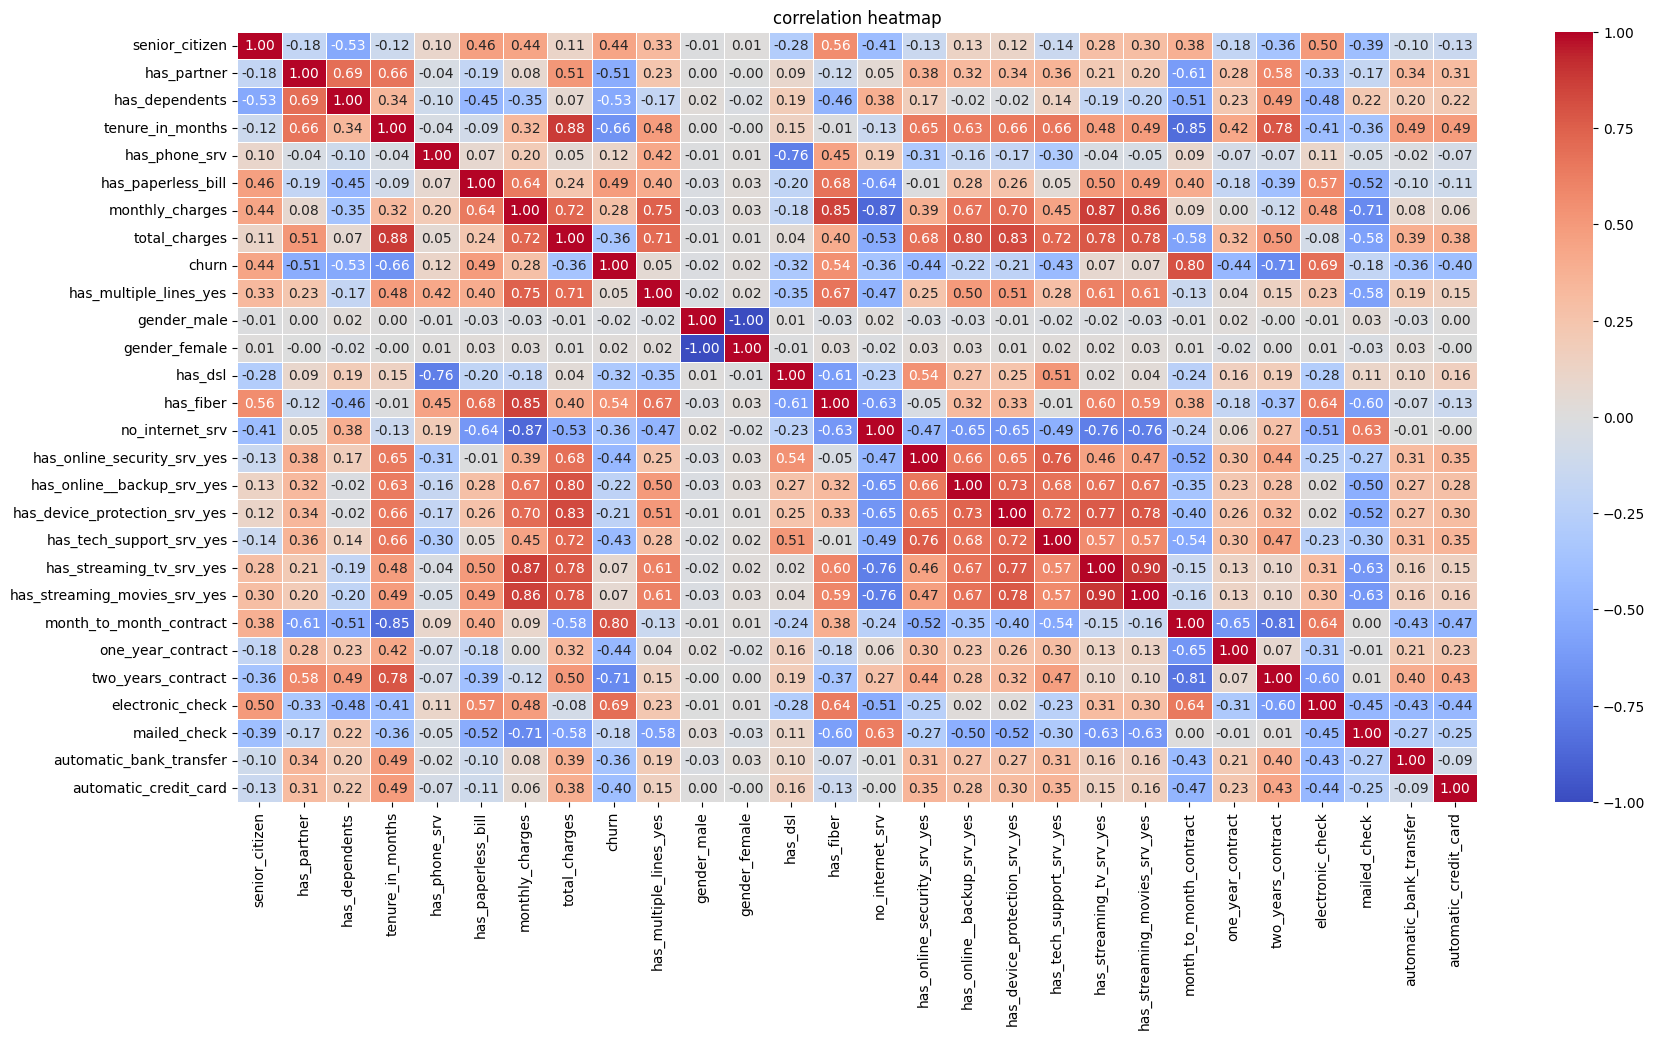

In [71]:
correlation_matrix = customerInfo.select_dtypes(include=['number']).corr()
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
print(f"top features correlated with churn:{churn_correlation}")
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

In [72]:
customerInfo.drop(columns=['gender_female'], inplace=True)
customerInfo.drop(columns=['gender_male'], inplace=True)
customerInfo.head()

,customer_id,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_paperless_bill,monthly_charges,total_charges,churn,...,has_tech_support_srv_yes,has_streaming_tv_srv_yes,has_streaming_movies_srv_yes,month_to_month_contract,one_year_contract,two_years_contract,electronic_check,mailed_check,automatic_bank_transfer,automatic_credit_card
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,0,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,1,0,0,0


<Axes: >

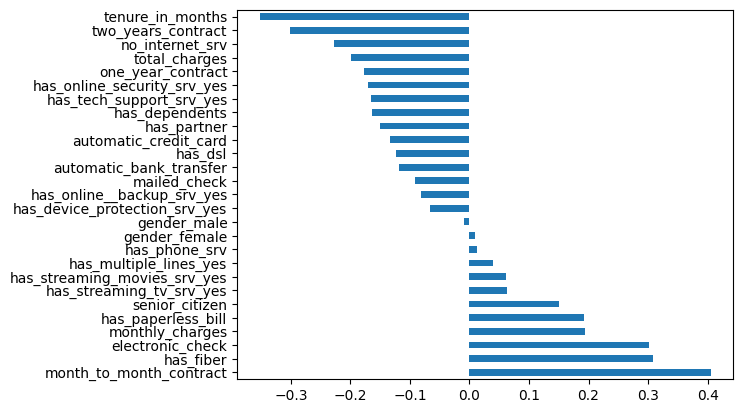

In [73]:
churn_correlation.drop('churn').plot(kind='barh')

In [74]:
customerInfo

,customer_id,senior_citizen,has_partner,has_dependents,tenure_in_months,has_phone_srv,has_paperless_bill,monthly_charges,total_charges,churn,...,has_tech_support_srv_yes,has_streaming_tv_srv_yes,has_streaming_movies_srv_yes,month_to_month_contract,one_year_contract,two_years_contract,electronic_check,mailed_check,automatic_bank_transfer,automatic_credit_card
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,0,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,1,1,1,0,1,0,0,1,0,0
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,1,0,1,0,0,0,0,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,1,0,0,1,0,0,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,1,0,0,0,1,0,0


## Stage 3: Train and Test Data Split

In [75]:
# split the dataset
trainCustomerInfo, testCustomerInfo = train_test_split(customerInfo, test_size=0.2, random_state=42, shuffle=True)
# define label and ID columns
label = 'churn'
customerId = 'customer_id'
# prepare training data
x_train = trainCustomerInfo.drop([label, customerId], axis=1)
y_train = trainCustomerInfo[label]
customerInfo_train = trainCustomerInfo[customerId]
# prepare test data
x_test = testCustomerInfo.drop([label, customerId], axis=1)
y_test = testCustomerInfo[label]
customerInfo_test = testCustomerInfo[customerId]

## Stage 4: Decision Tree ML

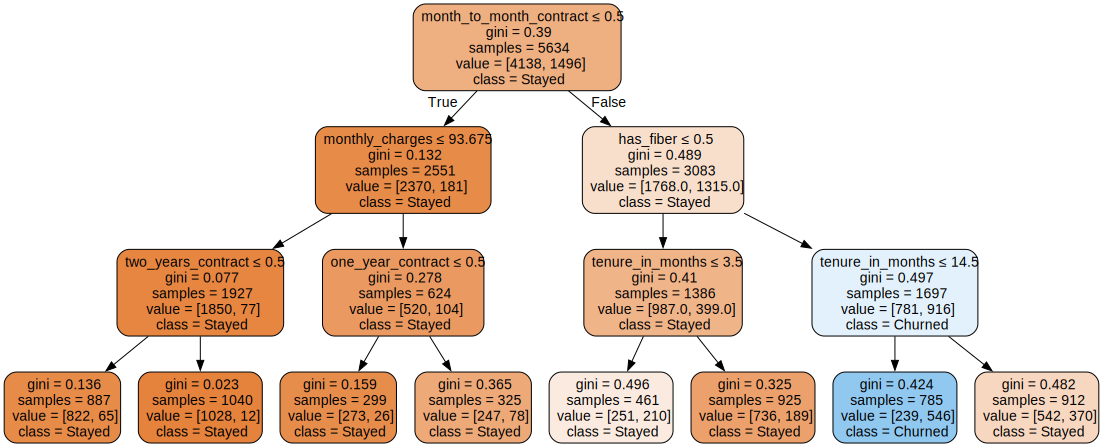

In [77]:
# train decision tree model
decisionTreeClassifier = DecisionTreeClassifier(max_depth=3)
decisionTreeClassifier.fit(x_train, y_train)
# make predictions on test set
y_test_pred = decisionTreeClassifier.predict(x_test)

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(
        tree,
        feature_names=features,
        class_names=labels,
        filled=True,
        rounded=True,
        special_characters=True
    ))
    display(SVG(graph.pipe(format='svg')))

plot_tree(decisionTreeClassifier, x_train.columns, ['Stayed', 'Churned'])

In [78]:
# evaluation for decision tree
test_acc = accuracy_score(y_test, y_test_pred)
test_acc

0.7955997161107168

Depth 2 | Train Acc: 0.7584 | Test Acc: 0.7786
Depth 3 | Train Acc: 0.7890 | Test Acc: 0.7956
Depth 4 | Train Acc: 0.7939 | Test Acc: 0.7970
Depth 5 | Train Acc: 0.7989 | Test Acc: 0.8027
Depth 6 | Train Acc: 0.8085 | Test Acc: 0.8105
Depth 7 | Train Acc: 0.8207 | Test Acc: 0.7949
Depth 8 | Train Acc: 0.8348 | Test Acc: 0.7921
Depth 9 | Train Acc: 0.8536 | Test Acc: 0.7651
Depth 10 | Train Acc: 0.8727 | Test Acc: 0.7665


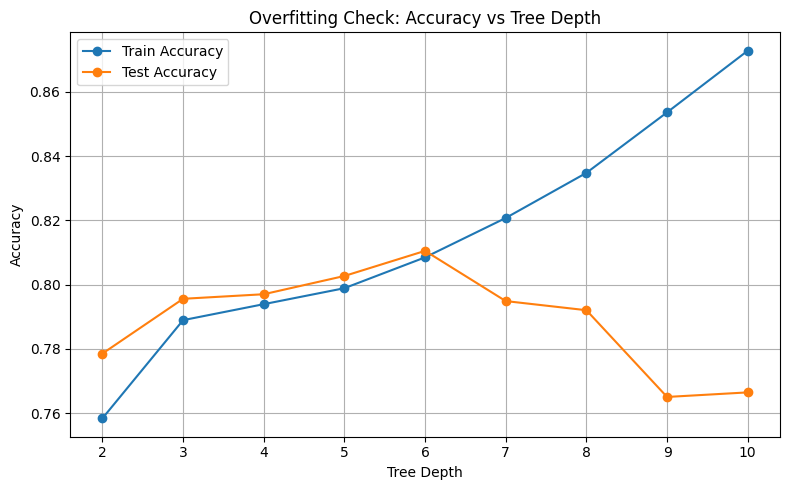

In [85]:
train_accuracies = []
test_accuracies = []
depths = range(2, 11)

best_accuracy = 0
best_depth = None
best_model = None

for depth in depths:
    decisionTreeClassifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    decisionTreeClassifier.fit(x_train, y_train)

    train_acc = accuracy_score(y_train, decisionTreeClassifier.predict(x_train))
    test_acc = accuracy_score(y_test, decisionTreeClassifier.predict(x_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Depth {depth} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_depth = depth
        best_model = decisionTreeClassifier

# Save the best model
joblib.dump(best_model, 'decision_tree_best_model.joblib')
    
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Check: Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Stage 5: Random Forest ML

Random forest outputs various depths and estimators

Depth  Estimators Train Accuracy  Test Accuracy  
7      180        0.8206          0.8148         
7      181        0.8206          0.8155         
7      182        0.8206          0.8148         
7      183        0.8207          0.8155         
7      184        0.8206          0.8148         
7      185        0.8207          0.8162         
7      186        0.8211          0.8162         
7      187        0.8214          0.8155         
7      188        0.8213          0.8155         
7      189        0.8209          0.8162         
8      180        0.8310          0.8112         
8      181        0.8307          0.8112         
8      182        0.8308          0.8119         
8      183        0.8307          0.8126         
8      184        0.8307          0.8119         
8      185        0.8305          0.8126         
8      186        0.8310          0.8133         
8      187        0.8308          0.8126       

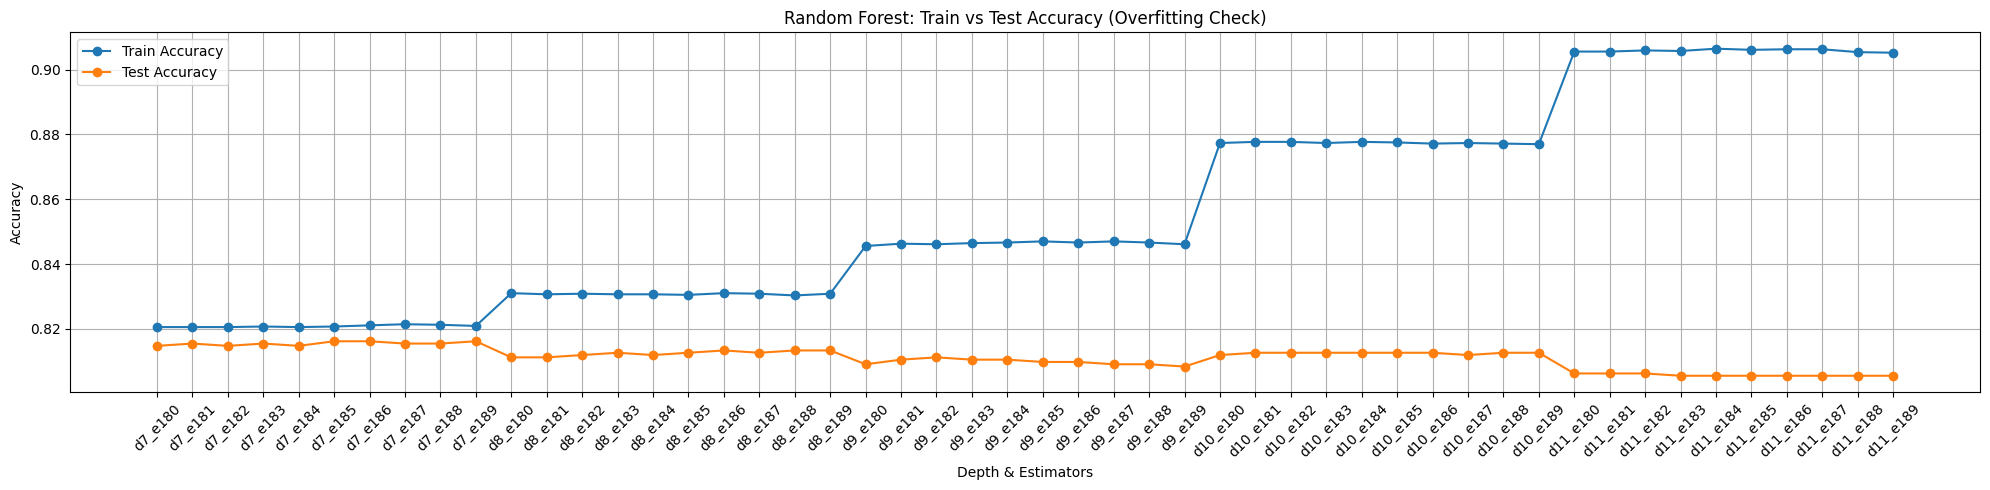

In [86]:
depths = range(7, 12)
estimators = range(180, 190)

best_accuracy = 0
best_params = {}
best_model = None

results = []

print("Random forest outputs various depths and estimators\n")
print(f"{'Depth':<6} {'Estimators':<10} {'Train Accuracy':<15} {'Test Accuracy':<15}")

for depth in depths:
    for estimator in estimators:
        randomForestClassifier = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=1)
        randomForestClassifier.fit(x_train, y_train)

        y_train_pred = randomForestClassifier.predict(x_train)
        y_test_pred = randomForestClassifier.predict(x_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        results.append((depth, estimator, train_acc, test_acc))

        print(f"{depth:<6} {estimator:<10} {train_acc:<15.4f} {test_acc:<15.4f}")

        if test_acc > best_accuracy:
            best_accuracy = test_acc
            best_params = {
                'max_depth': depth,
                'n_estimators': estimator
            }
            best_model = randomForestClassifier 

# Save the best model to file
if best_model:
    joblib.dump(best_model, 'random_forest_best_model.joblib')

print("\nBest Model Parameters:")
print(f"Max Depth     : {best_params['max_depth']}")
print(f"N Estimators  : {best_params['n_estimators']}")
print(f"Test Accuracy : {best_accuracy:.4f}")

depth_labels = []
train_accs = []
test_accs = []

for d, est, train, test in results:
    depth_labels.append(f"d{d}_e{est}")
    train_accs.append(train)
    test_accs.append(test)

plt.figure(figsize=(20, 5))
plt.plot(depth_labels, train_accs, label='Train Accuracy', marker='o')
plt.plot(depth_labels, test_accs, label='Test Accuracy', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Depth & Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Train vs Test Accuracy (Overfitting Check)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Stage 6: K Neighbors ML

K    Train Accuracy  Test Accuracy  
1    0.9977          0.7211         
2    0.8637          0.7573         
3    0.8614          0.7502         
4    0.8369          0.7686         
5    0.8340          0.7672         
6    0.8227          0.7800         
7    0.8213          0.7842         
8    0.8179          0.7850         
9    0.8174          0.7885         
10   0.8149          0.7906         
11   0.8115          0.7977         
12   0.8103          0.7942         
13   0.8072          0.7921         
14   0.8076          0.7913         
15   0.8067          0.7963         
16   0.8072          0.8041         
17   0.8037          0.7984         
18   0.8060          0.8006         
19   0.7991          0.8006         
20   0.8033          0.7991         


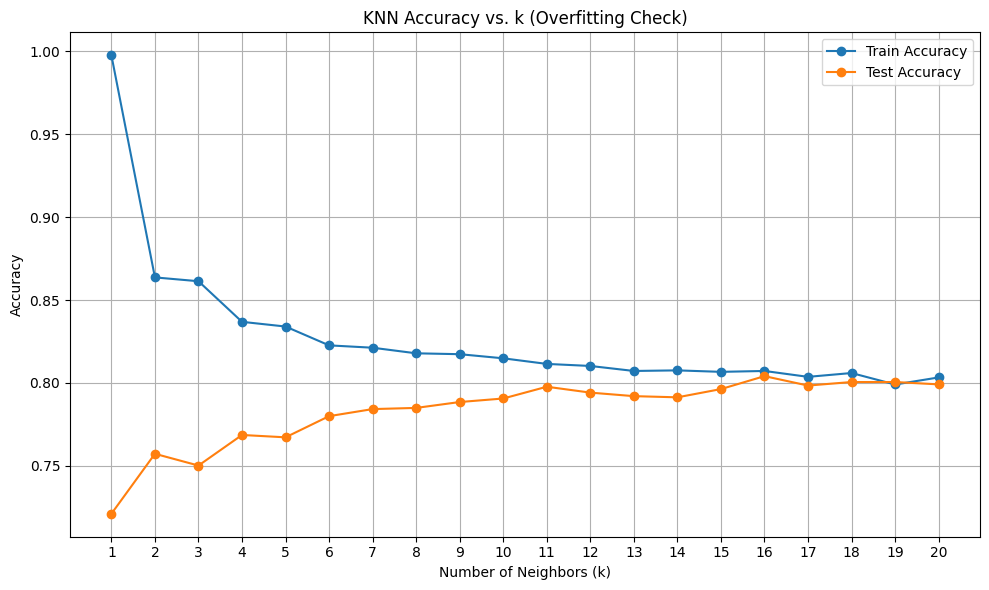


Best k: 16 with Test Accuracy: 0.8041


In [87]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

best_k = 0
best_accuracy = 0
best_model = None

print(f"{'K':<4} {'Train Accuracy':<15} {'Test Accuracy':<15}")
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, y_train)
    
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"{k:<4} {train_acc:<15.4f} {test_acc:<15.4f}")
    
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_k = k
        best_model = model

# Save the best model and scaler
if best_model:
    joblib.dump(best_model, 'best_knn_model.joblib')
    joblib.dump(scaler, 'scaler_for_knn_model.joblib')

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k (Overfitting Check)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nBest k: {best_k} with Test Accuracy: {best_accuracy:.4f}")

## Stage 7: Models Comparison and Results

In [82]:
models = {
    "Decision tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random forest": RandomForestClassifier(n_estimators=185, max_depth=7, random_state=1),
    "KNN": KNeighborsClassifier(n_neighbors=16)
}

results = []

for name, model in models.items():
    if name == "KNN":
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })
    
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall
0,Decision tree,0.810504,0.679054,0.538874
1,Random forest,0.816182,0.703571,0.528150
2,KNN,0.804116,0.664407,0.525469
